In [1]:
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import *

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [44]:
X = np.random.rand(1000, 2)
y = np.where((X[:,0]**2 + X[:,1]**2)<0.5, 1, 0)

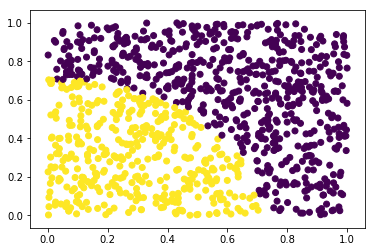

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

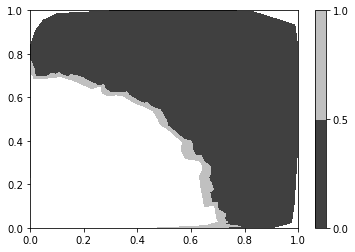

In [5]:
plt.tricontourf(X[:,0],X[:,1],y,[0,0.5,1],cmap=plt.cm.binary_r)
plt.colorbar()

In [6]:
sess = tf.InteractiveSession()

In [7]:
# clear_layers_name()
# tf.reset_default_graph()

In [7]:
X_ = tf.placeholder(tf.float32, shape=[None, 2], name='X')
y_ = tf.placeholder(tf.int64, shape=[None], name='y')

In [8]:
network = InputLayer(X_, name='input')
network = DenseLayer(network, n_units=8, act=tf.nn.relu, name='relu1')
network = DenseLayer(network, n_units=8, act=tf.nn.relu, name='relu2')
network = DenseLayer(network, n_units=2, act=tf.identity, name='output')

  [TL] InputLayer  input: (?, 2)
  [TL] DenseLayer  relu1: 8 relu
  [TL] DenseLayer  relu2: 8 relu
  [TL] DenseLayer  output: 2 identity


In [9]:
cost = tl.cost.cross_entropy(network.outputs, y_, name='cost')
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(network.outputs, 1), y_), tf.float32))

In [19]:
y_op = tf.argmax(tf.nn.softmax(network.outputs), 1)

In [10]:
train_param = network.all_params
train_op = tf.train.AdamOptimizer()
train_op = train_op.minimize(cost, var_list=train_param)

In [11]:
tl.layers.initialize_global_variables(sess)

In [12]:
network.print_params()
network.print_layers()

  param   0: relu1/W:0            (2, 8)             float32_ref (mean: 0.0007031159475445747, median: 0.004553896375000477, std: 0.09937632083892822)   
  param   1: relu1/b:0            (8,)               float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
  param   2: relu2/W:0            (8, 8)             float32_ref (mean: -0.007980786263942719, median: -0.004628488793969154, std: 0.09562813490629196)   
  param   3: relu2/b:0            (8,)               float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
  param   4: output/W:0           (8, 2)             float32_ref (mean: 0.001954615581780672, median: -0.005815606564283371, std: 0.09703730791807175)   
  param   5: output/b:0           (2,)               float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
  num of params: 114
  layer   0: relu1/Relu:0         (?, 8)             float32
  layer   1

In [17]:
tl.utils.fit(sess, network, train_op, cost, X, y, X_, y_, batch_size=100, n_epoch=200, acc=acc, X_val=X, y_val=y, print_freq=50)

Start training the network ...
Epoch 1 of 200 took 0.029500s
   train loss: 0.157462
   train acc: 0.936000
   val loss: 0.157462
   val acc: 0.936000
Epoch 50 of 200 took 0.019502s
   train loss: 0.084286
   train acc: 0.975000
   val loss: 0.084286
   val acc: 0.975000
Epoch 100 of 200 took 0.019523s
   train loss: 0.053020
   train acc: 0.992000
   val loss: 0.053020
   val acc: 0.992000
Epoch 150 of 200 took 0.020500s
   train loss: 0.039294
   train acc: 0.992000
   val loss: 0.039294
   val acc: 0.992000
Epoch 200 of 200 took 0.019000s
   train loss: 0.032681
   train acc: 0.992000
   val loss: 0.032681
   val acc: 0.992000
Total training time: 4.486583s


In [22]:
tl.utils.test(sess, network, acc, X, y, X_, y_, batch_size=None)

Start testing the network ...
   test acc: 0.992000


In [23]:
tl.utils.predict(sess, network, np.array([[0.8, 0.8],[0.1, 0.1]], dtype=np.float32), X_, y_op)

array([0, 1], dtype=int64)

In [34]:
px, py = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
pxy = np.vstack([x.flatten(), y.flatten()]).T
pz = tl.utils.predict(sess, network, pxy, X_, y_op)
pz = pz.reshape(50, 50)

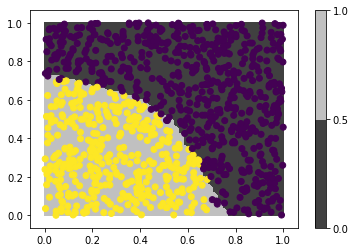

In [51]:
plt.contourf(px, py, pz, [0, 0.5, 1], cmap=plt.cm.binary_r)
plt.colorbar()
plt.scatter(X[:,0], X[:,1], c=y)